In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import df with outliers from price and bedrooms removed 
df = pd.read_csv('housing_outliers_removed.csv')

In [3]:
df_ohe = pd.get_dummies(data=df, columns=['grade', 'condition', 'waterfront', 'view'], drop_first=True)

In [4]:
df_ohe

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,...,grade_12,condition_2,condition_3,condition_4,condition_5,waterfront_1,view_1,view_2,view_3,view_4
0,0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,1180,...,0,0,1,0,0,0,0,0,0,0
1,1,6414100192,1418083200000000000,538000.0,3,2.25,2570,7242,2.0,2170,...,0,0,1,0,0,0,0,0,0,0
2,2,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,770,...,0,0,1,0,0,0,0,0,0,0
3,3,2487200875,1418083200000000000,604000.0,4,3.00,1960,5000,1.0,1050,...,0,0,0,0,1,0,0,0,0,0
4,4,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,1680,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20735,21608,263000018,1400630400000000000,360000.0,3,2.50,1530,1131,3.0,1530,...,0,0,1,0,0,0,0,0,0,0
20736,21609,6600060120,1424649600000000000,400000.0,4,2.50,2310,5813,2.0,2310,...,0,0,1,0,0,0,0,0,0,0
20737,21610,1523300141,1403481600000000000,402101.0,2,0.75,1020,1350,2.0,1020,...,0,0,1,0,0,0,0,0,0,0
20738,21611,291310100,1421366400000000000,400000.0,3,2.50,1600,2388,2.0,1600,...,0,0,1,0,0,0,0,0,0,0


In [13]:
df_ohe.drop(columns=['date', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

In [20]:
df_ohe.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [21]:
X = df_ohe.drop('price', axis=1)
y = df_ohe['price']

linreg = LinearRegression()
lm = sm.OLS(y, X)


model_train = lm.fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1004.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:38:06   Log-Likelihood:            -2.7607e+05
No. Observations:               20740   AIC:                         5.522e+05
Df Residuals:                   20711   BIC:                         5.524e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -5.678e-07   3.58e-07     -1.587      0.113   -1.27e-06    1.33e-07
bedrooms      -1.116e+04   1541.318     -7.242      0.000   -1.42e+04   -8141.575
bathrooms      1399.8608   2417.832      0.579      0.563   -3339.281    6139.002
sqft_living      56.2265      1.843     30.512      0.000      52.614      59.838
sqft_lot          0.1294      0.036      3.567      0.000       0.058       0.200
floors          4.51e+04   2695.707     16.732      0.000    3.98e+04    5.04e+04
sqft_above        2.8472      1.793      1.588      0.112      -0.666       6.361
sqft_basement    53.4489      2.017     26.499      0.000      49.495      57.402
yr_built      -1209.7369     34.419    -35.148      0.000   -1277.200   -1142.274
yr_renovated     33.7335      2.748     12.274      0.000      28.346      39.121
sqft_living15    54.3456      2.682     20.265      0.000      49.089      59.602
sqft_lot15       -0.3620      0.055     -6.558      0.000      -0.470      -0.254
grade_4        2.126e+06   7.03e+04     30.237      0.000    1.99e+06    2.26e+06
grade_5        2.144e+06   6.51e+04     32.925      0.000    2.02e+06    2.27e+06
grade_6        2.185e+06   6.49e+04     33.679      0.000    2.06e+06    2.31e+06
grade_7        2.256e+06   6.53e+04     34.572      0.000    2.13e+06    2.38e+06
grade_8        2.341e+06   6.55e+04     35.724      0.000    2.21e+06    2.47e+06
grade_9        2.459e+06   6.58e+04     37.398      0.000    2.33e+06    2.59e+06
grade_10        2.55e+06   6.59e+04     38.699      0.000    2.42e+06    2.68e+06
grade_11       2.636e+06   6.66e+04     39.607      0.000    2.51e+06    2.77e+06
grade_12       2.599e+06   8.38e+04     31.005      0.000    2.44e+06    2.76e+06
condition_2    2.605e+05   2.94e+04      8.863      0.000    2.03e+05    3.18e+05
condition_3    2.737e+05   2.75e+04      9.967      0.000     2.2e+05    3.28e+05
condition_4    3.016e+05   2.74e+04     11.010      0.000    2.48e+05    3.55e+05
condition_5    3.561e+05   2.75e+04     12.967      0.000    3.02e+05     4.1e+05
waterfront_1   8.736e+04   1.98e+04      4.415      0.000    4.86e+04    1.26e+05
view_1         7.637e+04   8761.249      8.717      0.000    5.92e+04    9.35e+04
view_2          5.38e+04   5260.086     10.229      0.000    4.35e+04    6.41e+04
view_3         6.635e+04   7715.399      8.600      0.000    5.12e+04    8.15e+04
view_4         1.557e+05   1.28e+04     12.213      0.000    1.31e+05    1.81e+05
==============================================================================
Omnibus:                     5403.805   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52967.741
Skew:                           0.971   Prob(JB):                         0.00
Kurtosis:                      10.584   Cond. No.            

In [22]:
X = df_ohe.drop('price', axis=1)
y = df_ohe['price']

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline

0.606482764023288

In [25]:
co_lin = df_ohe.corr().abs().stack().reset_index().sort_values(0, ascending=False)

co_lin['pairs'] = list(zip(co_lin.level_0, co_lin.level_1))

co_lin.set_index(['pairs'], inplace = True)

co_lin.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
co_lin.columns = ['cc']

co_lin.drop_duplicates(inplace=True)

co_lin[(co_lin.cc>.7) & (co_lin.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.857731
"(condition_4, condition_3)",0.815829
"(sqft_living15, sqft_living)",0.744942
"(sqft_living, bathrooms)",0.723443
"(sqft_living15, sqft_above)",0.722329
"(sqft_lot, sqft_lot15)",0.710867


In [26]:
#droping additional coliniar columns 
df_ohe.drop(columns=['sqft_above', 'condition_3', 'sqft_lot15', 'sqft_lot', 'sqft_living15'], inplace=True)

In [28]:
from itertools import combinations

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 5 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:5])

0
50
100
150
200
250
300
350
400
Top 5 interactions: [('yr_built', 'sqft_living15', 0.612), ('sqft_living15', 'condition_3', 0.61), ('floors', 'sqft_living15', 0.609), ('sqft_living', 'condition_5', 0.608), ('yr_built', 'grade_6', 0.608)]


In [29]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X.copy()

final['yr_built_and_sqft_living15'] = final['yr_built'] * final['sqft_living15']
final['sqft_living15_and_condition_3'] = final['sqft_living15'] * final['condition_3']
final['floors_and_sqft_living15'] = final['floors'] * final['sqft_living15']
final['sqft_living_and_condition_5'] = final['sqft_living'] * final['condition_5']
final['yr_built_and_grade_6'] = final['yr_built'] * final['grade_6']

final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model

0.6152384058311448

In [54]:
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


model = sm.OLS(y,final)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1005.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:21:43   Log-Likelihood:            -2.7504e+05
No. Observations:               20740   AIC:                         5.502e+05
Df Residuals:                   20706   BIC:                         5.504e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
id                            -2.673e-07   3.41e-07     -0.784      0.433   -9.35e-07    4.01e-07
bedrooms                      -1.665e+04   1473.913    -11.298      0.000   -1.95e+04   -1.38e+04
bathrooms                      2.625e+04   2383.240     11.015      0.000    2.16e+04    3.09e+04
sqft_living                      52.8722      1.789     29.550      0.000      49.365      56.379
sqft_lot                          0.0722      0.035      2.086      0.037       0.004       0.140
floors                         4.778e+04   7364.589      6.487      0.000    3.33e+04    6.22e+04
sqft_above                       16.9328      1.816      9.325      0.000      13.373      20.492
sqft_basement                    35.5732      2.008     17.716      0.000      31.637      39.509
yr_built                       -158.1312     42.538     -3.717      0.000    -241.509     -74.753
yr_renovated                      4.9334      2.700      1.827      0.068      -0.359      10.226
sqft_living15                  2875.0460     65.721     43.746      0.000    2746.227    3003.865
sqft_lot15                       -0.3104      0.053     -5.899      0.000      -0.414      -0.207
grade_4                        1.282e+05   8.21e+04      1.562      0.118   -3.27e+04    2.89e+05
grade_5                        1.527e+05   7.81e+04      1.956      0.051    -351.034    3.06e+05
grade_6                       -1.625e+06   3.01e+05     -5.406      0.000   -2.21e+06   -1.04e+06
grade_7                          2.7e+05    7.8e+04      3.461      0.001    1.17e+05    4.23e+05
grade_8                        3.552e+05   7.81e+04      4.547      0.000    2.02e+05    5.08e+05
grade_9                        4.905e+05   7.81e+04      6.277      0.000    3.37e+05    6.44e+05
grade_10                       5.866e+05   7.83e+04      7.497      0.000    4.33e+05     7.4e+05
grade_11                       6.833e+05   7.88e+04      8.674      0.000    5.29e+05    8.38e+05
grade_12                        6.61e+05   9.23e+04      7.165      0.000     4.8e+05    8.42e+05
condition_2                    7.186e+04   2.84e+04      2.533      0.011    1.62e+04    1.27e+05
condition_3                    1.466e+05   2.76e+04      5.321      0.000    9.26e+04    2.01e+05
condition_4                    1.133e+05   2.65e+04      4.281      0.000    6.14e+04    1.65e+05
condition_5                    1.097e+05   2.84e+04      3.866      0.000    5.41e+04    1.65e+05
waterfront_1                   9.809e+04   1.89e+04      5.203      0.000    6.11e+04    1.35e+05
view_1                          4.97e+04   8367.801      5.939      0.000    3.33e+04    6.61e+04
view_2                         3.016e+04   5036.658      5.988      0.000    2.03e+04       4e+04
view_3                         4.145e+04   73

In [ ]:
#not taking into account interactions 

In [45]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [46]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Add  sqft_above                     with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  yr_built                       with p-value 1.29015e-264
Add  sqft_living15                  with p-value 4.95715e-261
Add  floors                         with p-value 1.61304e-261
Add  grade_9                        with p-value 1.25067e-118
Add  grade_10                       with p-value 1.12964e-170
Add  grade_8                        with p-value 1.30721e-199
Add  grade_11                       with p-value 8.62549e-218
Drop sqft_above                     with p-value 0.52606


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:46: FutureWarning:


The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.



Add  grade_7                        with p-value 5.95976e-160
Add  view_4                         with p-value 3.48423e-49
Add  bathrooms                      with p-value 3.40862e-32
Add  bedrooms                       with p-value 2.63722e-27
Add  condition_5                    with p-value 5.10323e-27
Add  grade_12                       with p-value 2.13422e-19
Add  view_2                         with p-value 1.17991e-12
Add  view_3                         with p-value 7.19091e-14
Add  view_1                         with p-value 2.23967e-14
Add  grade_6                        with p-value 1.07538e-11
Add  condition_4                    with p-value 3.7717e-06
Add  waterfront_1                   with p-value 4.62996e-06
Add  condition_3                    with p-value 5.70416e-06
Add  sqft_lot15                     with p-value 8.76927e-05
Add  sqft_above                     with p-value 6.59651e-05
Add  sqft_lot                       with p-value 0.000642471
resulting features:
['sq

In [64]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model_final = sm.OLS(y,X_with_intercept).fit()
model_final.summary()

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1339.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:28:26   Log-Likelihood:            -2.7524e+05
No. Observations:               20740   AIC:                         5.505e+05
Df Residuals:                   20715   BIC:                         5.507e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.372e+06   9.03e+04     59.479      0.000    5.19e+06    5.55e+06
sqft_basement    42.8300      1.954     21.917      0.000      39.000      46.660
sqft_living      49.2994      1.778     27.721      0.000      45.814      52.785
yr_built      -2773.1400     46.804    -59.251      0.000   -2864.879   -2681.401
sqft_living15    55.7380      2.572     21.668      0.000      50.696      60.780
floors         5.327e+04   2596.500     20.517      0.000    4.82e+04    5.84e+04
grade_9        3.687e+05   9975.852     36.959      0.000    3.49e+05    3.88e+05
grade_10       4.551e+05   1.12e+04     40.767      0.000    4.33e+05    4.77e+05
grade_8        2.445e+05   9258.399     26.403      0.000    2.26e+05    2.63e+05
grade_11        5.35e+05   1.48e+04     36.057      0.000    5.06e+05    5.64e+05
grade_7        1.497e+05   8892.570     16.838      0.000    1.32e+05    1.67e+05
view_4         1.388e+05   1.22e+04     11.335      0.000    1.15e+05    1.63e+05
bathrooms      2.914e+04   2391.593     12.185      0.000    2.45e+04    3.38e+04
bedrooms      -1.519e+04   1482.151    -10.250      0.000   -1.81e+04   -1.23e+04
condition_5    9.265e+04   1.07e+04      8.651      0.000    7.17e+04    1.14e+05
grade_12        5.03e+05   5.11e+04      9.852      0.000    4.03e+05    6.03e+05
view_2         3.979e+04   5064.446      7.856      0.000    2.99e+04    4.97e+04
view_3         5.488e+04   7418.002      7.398      0.000    4.03e+04    6.94e+04
view_1         6.355e+04   8422.849      7.545      0.000     4.7e+04    8.01e+04
grade_6        5.879e+04   9125.954      6.442      0.000    4.09e+04    7.67e+04
condition_4    5.687e+04   1.03e+04      5.535      0.000    3.67e+04     7.7e+04
waterfront_1   8.862e+04    1.9e+04      4.666      0.000    5.14e+04    1.26e+05
condition_3    4.657e+04   1.02e+04      4.553      0.000    2.65e+04    6.66e+04
sqft_lot15       -0.2750      0.053     -5.195      0.000      -0.379      -0.171
sqft_above        6.4694      1.723      3.755      0.000       3.092       9.846
sqft_lot          0.1189      0.035      3.414      0.001       0.051       0.187
==============================================================================
Omnibus:                     1260.432   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2149.592
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       4.254   Cond. No.                     1.12e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.93e-19. This might indicate that there are
strong multicollinearity problems or that the design

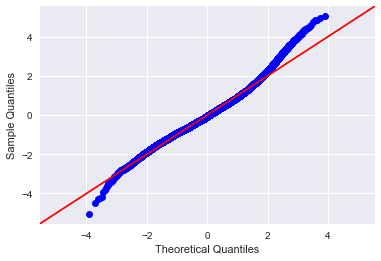

In [73]:
fig = sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)

In [69]:
results.predict()

array([319844.26762185, 552917.00057091, 428011.96097817, ...,
       256005.27268529, 424258.57096655, 257791.65300459])

In [75]:
print('RMSE:', np.sqrt(mean_squared_error(y, results.predict())))

RMSE: 139034.55297883332
